# Microservice-Architektur für SecondStyle (Neue Struktur)

## Übersicht der Microservices

| Service                | Beschreibung                                      | Datenbank                  | API vorhanden | Kommunikation           |
|------------------------|---------------------------------------------------|----------------------------|---------------|-------------------------|
| API Gateway            | Zentrale Schnittstelle für alle Anfragen          | ❌                         | ✅            | Verteilt synchron Anfragen |
| Auth Service           | Authentifizierung, Tokenmanagement                | PostgreSQL (Auth DB)       | ✅            | REST synchron           |
| User Profile Service   | Nutzerprofile, Stammdaten                         | PostgreSQL (User DB)       | ✅            | REST synchron           |
| Artikel Service        | Artikel einstellen, bearbeiten                    | PostgreSQL (Artikel DB)    | ✅            | REST synchron           |
| Artikel Suche Service  | Artikelsuche, Filter                              | Elasticsearch (Suche DB)   | ✅            | REST synchron           |
| Zahlungsservice        | Zahlungen, Transaktionen                          | PostgreSQL (Zahlungs-DB)   | ✅            | REST + Events           |
| Versandservice         | Versandabwicklung, Labels, Tracking               | PostgreSQL (Versand-DB)    | ✅            | Asynchron (Event-basiert)|
| Bewertungsservice      | Bewertungen, Rezensionen                          | PostgreSQL (Review DB)     | ✅            | REST synchron           |
| Like Service           | Likes, Favoriten                                  | MongoDB (Like DB)          | ✅            | REST synchron           |
| Messaging Service      | Nachrichten zwischen Nutzern                      | MongoDB (Messaging DB)     | ✅            | REST synchron           |
| Notification Service   | E-Mail & SMS Benachrichtigungen                   | ❌                         | ✅            | Asynchron (Events)      |
| Monitoring Service     | Monitoring, Healthchecks                          | ❌                         | ✅            | REST synchron           |
| Moderation Service     | Moderation von Inhalten                           | ❌                         | ✅            | REST synchron           |
| Analytics Service      | Statistiken, Auswertungen                         | ❌                         | ✅            | REST synchron           |

---

## Kommunikationstypen

| Von → Nach                 | Typ        |
|----------------------------|------------|
| Client → API Gateway → Services | Synchron   |
| Zahlungsservice → Versandservice | Asynchron  |
| Versandservice → Notification   | Asynchron  |
| Moderation → Artikel/Review/Messaging | Synchron   |
| Services → User Profile Service | Synchron   |

---

## PlantUML-Komponenten-Diagramm

```plantuml
@startuml
!define RECTANGLE class
skinparam componentStyle rectangle
top to bottom direction

package "Clients" {
    actor "Web User" as WebUser
    actor "Mobile App User" as MobileUser
    actor "Admin User" as AdminUser
    [Web UI] as WebUI
    [Mobile App] as MobileApp
    [Admin UI] as AdminUI

    WebUser --> WebUI
    MobileUser --> MobileApp
    AdminUser --> AdminUI
}

package "SecondStyle System" {

    [API Gateway] as Gateway

    component "Auth Service" as Auth
    component "User Profile Service" as UserProfile
    component "Artikel Service" as Artikel
    component "Artikel Suche Service" as ArtikelSuche
    component "Zahlungsservice" as Payment
    component "Versandservice" as Shipping
    component "Bewertungsservice" as Review
    component "Like Service" as Like
    component "Messaging Service" as Messaging
    component "Notification Service" as Notification
    component "Monitoring Service" as Monitoring
    component "Moderation Service" as Moderation
    component "Analytics Service" as Analytics

    database "Auth DB\n(PostgreSQL)" as AuthDB
    database "User DB\n(PostgreSQL)" as UserDB
    database "Artikel DB\n(PostgreSQL)" as ArtikelDB
    database "Suche DB\n(Elasticsearch)" as SearchDB
    database "Zahlungs-DB\n(PostgreSQL)" as PaymentDB
    database "Versand-DB\n(PostgreSQL)" as ShippingDB
    database "Review DB\n(PostgreSQL)" as ReviewDB
    database "Like DB\n(MongoDB)" as LikeDB
    database "Messaging DB\n(MongoDB)" as MessagingDB

    WebUI --> Gateway
    MobileApp --> Gateway
    AdminUI --> Gateway

    Gateway --> Auth : REST
    Gateway --> UserProfile : REST
    Gateway --> Artikel : REST
    Gateway --> ArtikelSuche : REST
    Gateway --> Payment : REST
    Gateway --> Review : REST
    Gateway --> Like : REST
    Gateway --> Messaging : REST
    Gateway --> Notification : REST
    Gateway --> Monitoring : REST
    Gateway --> Moderation : REST
    Gateway --> Analytics : REST

    Auth --> AuthDB
    UserProfile --> UserDB
    Artikel --> ArtikelDB
    ArtikelSuche --> SearchDB
    Payment --> PaymentDB
    Shipping --> ShippingDB
    Review --> ReviewDB
    Like --> LikeDB
    Messaging --> MessagingDB

    Payment --> Shipping : Event (asynchron)
    Shipping --> Notification : Event (asynchron)
    Payment --> UserProfile : REST
    Artikel --> UserProfile : REST
    Review --> UserProfile : REST
    Like --> UserProfile : REST
    Messaging --> UserProfile : REST
    Moderation --> Artikel : REST
    Moderation --> Review : REST
    Moderation --> Messaging : REST
}

' Jetzt das Paket der externen Adapter, nach dem System-Paket
package "Externe Adapter" {
    [Stripe Adapter] as Stripe
    [Twilio Adapter] as Twilio
    [SendGrid Adapter] as SendGrid

    Payment --> Stripe : Zahlungsabwicklung
    Notification --> Twilio : SMS
    Notification --> SendGrid : E-Mail
}

' Optional: Unsichtbare Verbindung von einem Service zu einem Adapter, um die vertikale Reihenfolge zu fixieren
Payment -[hidden]-> Stripe
@enduml

```

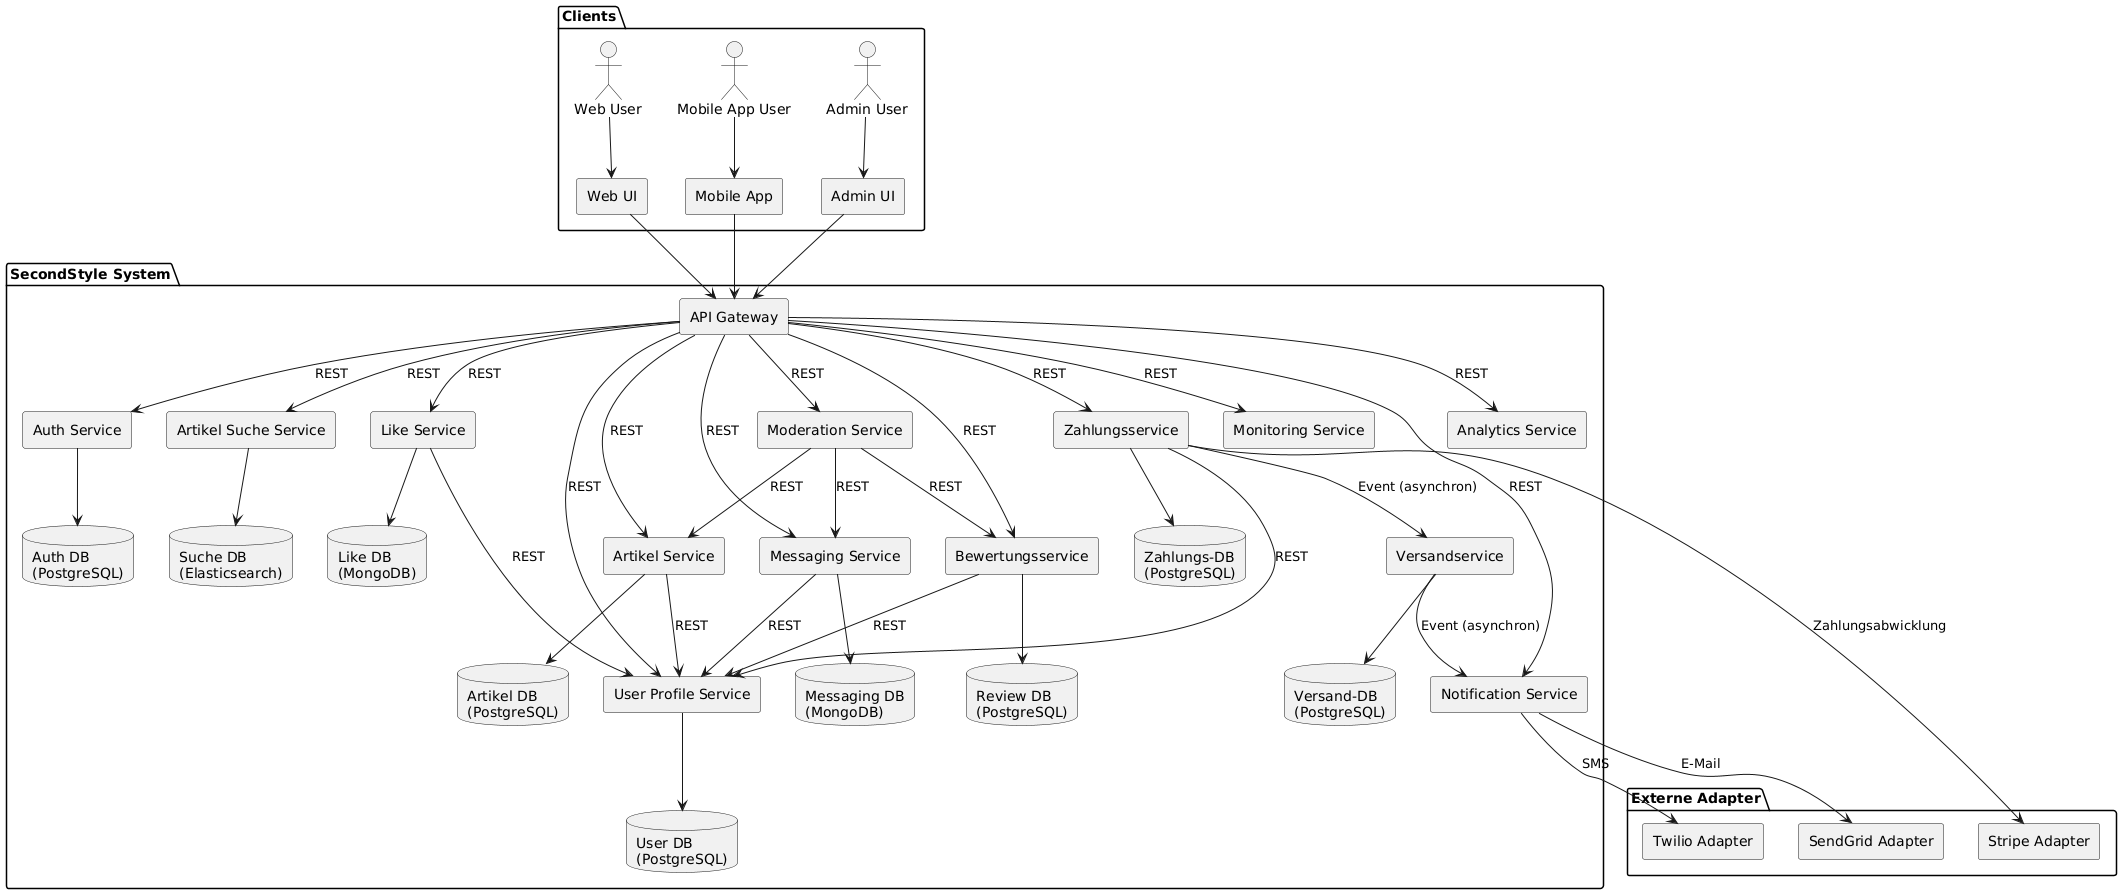
